<a href="https://colab.research.google.com/github/MRazin172/Reinforcement-Learning/blob/main/2348534_RL_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [113]:
ad_slots = ["top_banner", "sidebar", "footer", "pop_up"]
true_ctr = [0.04, 0.02, 0.03, 0.01]
epsilon = 0.1
num_slots = len(ad_slots)
num_impressions = 1000

counts = [0] * num_slots
estimated_ctr = [0] * num_slots
total_clicks = 0

here we are assigning true ctr to each of the ad slots. this done so that we can compare it to the estimated ctr later on

the epilon value is set to 0.1. this means that the algorithm exploites 90 perc of the time and explores 10 perc of time in order to find a better algorithm.

the no of impressions are set to 1000 as told in the question

In [114]:
click_history = []
slot_selection_history = []
ctr_progression = [[] for _ in range(num_slots)]

In [115]:
def get_click(slot_index):
    return np.random.rand() < true_ctr[slot_index]

for i in range(num_impressions):
    if random.random() < epsilon:
        chosen_slot = random.randint(0, num_slots - 1)
    else:
        chosen_slot = np.argmax(estimated_ctr)

    click = get_click(chosen_slot)
    total_clicks += click
    click_history.append(total_clicks)
    slot_selection_history.append(chosen_slot)

    counts[chosen_slot] += 1
    estimated_ctr[chosen_slot] += (click - estimated_ctr[chosen_slot]) / counts[chosen_slot]

    for j in range(num_slots):
        ctr_progression[j].append(estimated_ctr[j])

print("Ad slot performance after 1000 impressions:")
for i in range(num_slots):
    print(f"Ad slot '{ad_slots[i]}' -> Estimated CTR: {estimated_ctr[i]:.4f}, Shown: {counts[i]} times")

print(f"\nTotal Clicks: {total_clicks}")

Ad slot performance after 1000 impressions:
Ad slot 'top_banner' -> Estimated CTR: 0.0463, Shown: 842 times
Ad slot 'sidebar' -> Estimated CTR: 0.0345, Shown: 29 times
Ad slot 'footer' -> Estimated CTR: 0.0297, Shown: 101 times
Ad slot 'pop_up' -> Estimated CTR: 0.0000, Shown: 28 times

Total Clicks: 43


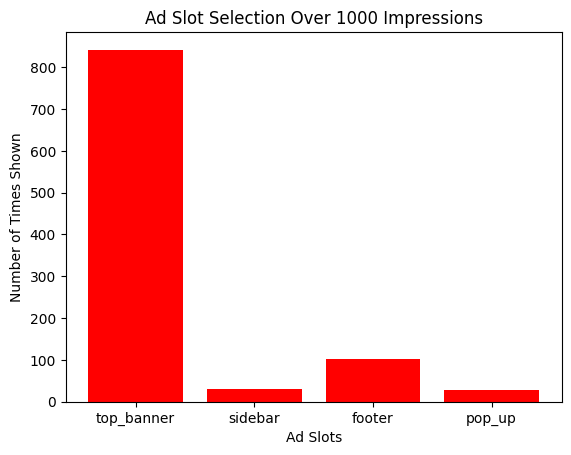

In [116]:
plt.bar(ad_slots, counts, color='red')
plt.xlabel('Ad Slots')
plt.ylabel('Number of Times Shown')
plt.title('Ad Slot Selection Over 1000 Impressions')
plt.show()

here we can see that the top banner ad slot was the most effective in getting the most clicks. it had the highest ctr of 0.04 thats why it was more exploited. and as the other ad slots did not have much ctr when explored the algorithm did not use them much.

the top banner was used 842 times out of 1000
rest all the algorithms were used 29, 101 and 28 times.

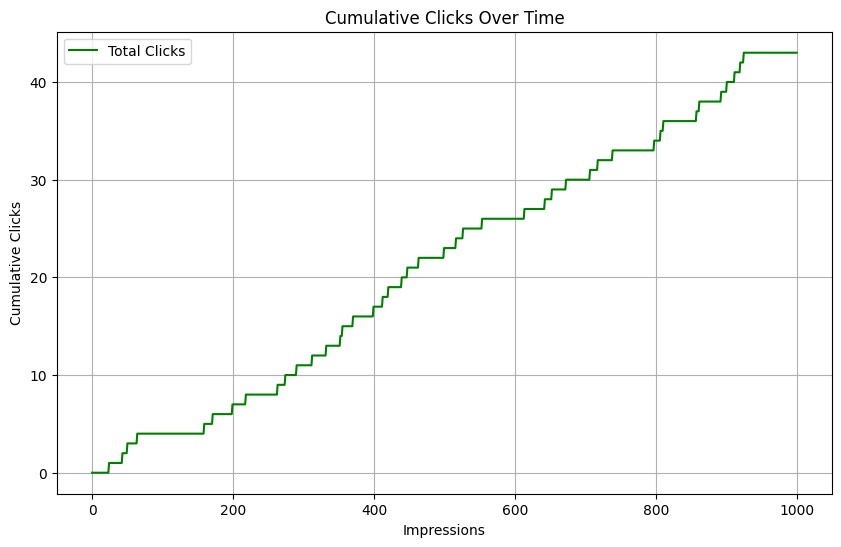

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(click_history, label='Total Clicks', color='green')
plt.xlabel('Impressions')
plt.ylabel('Cumulative Clicks')
plt.title('Cumulative Clicks Over Time')
plt.grid(True)
plt.legend()
plt.show()


This shows how the total number of clicks as the algorithm serves more ads.

In the beginning, the algorithm will explore more (due to the epsilon-greedy strategy), so the rate of clicks might be low

here as we can see the graph line becomes more steeper and rate of clicks are increasing faster after aprox 300 impressions. this tells us that the algorithm identifies the best ad slot after passing 300 impresssions. and the algorithm will exploit this ad slot more. thats why the no of clicks is incresing rapidly.

here the line becomes steeper as impressions increase, it means the algorithm is learning and focusing on the most effective ad slot.


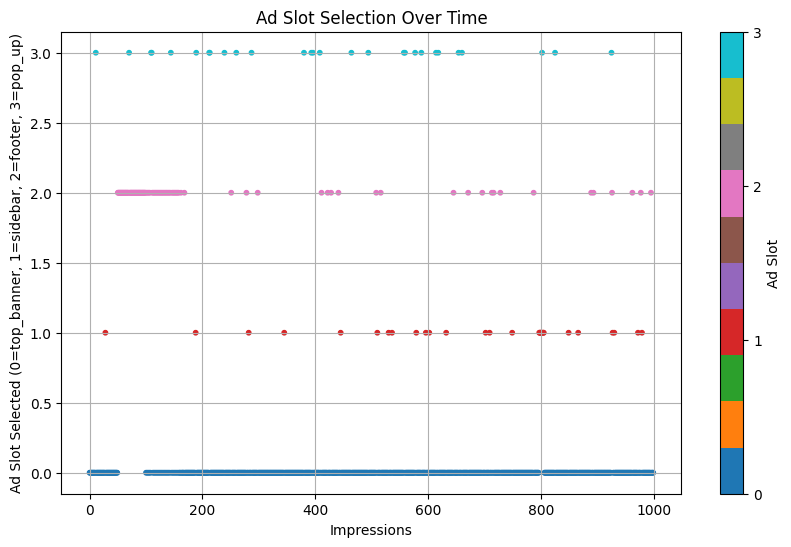

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(range(num_impressions), slot_selection_history, c=slot_selection_history, cmap='tab10', s=10)
plt.xlabel('Impressions')
plt.ylabel('Ad Slot Selected (0=top_banner, 1=sidebar, 2=footer, 3=pop_up)')
plt.title('Ad Slot Selection Over Time')
plt.grid(True)
plt.colorbar(ticks=range(num_slots), label='Ad Slot')
plt.show()

here we can that the algorihtm mostly exploits the top banner ad slot as it has the highest click rate. the algorithm learns that the top banner has highest ctr and exploits it the most.

The sidebar (1), footer (2), and pop-up (3) were explored periodically, but their selection frequency is low compared to the top banner.

if you look closely the left side of graph shows more variation. this means that in the early stages it explores more with diff ad slots. but later on the algorithm purely focuses on the top banner as it gave more ctr.

the spots on the right side tells us that few times the algorithm also tried exploring other alogirthms even though their ctr was low.

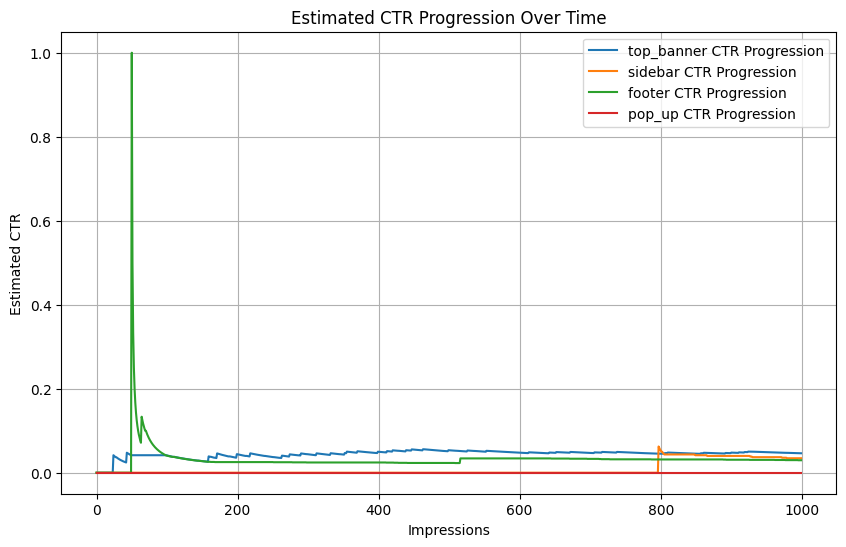

In [120]:
plt.figure(figsize=(10, 6))
for j in range(num_slots):
    plt.plot(ctr_progression[j], label=f'{ad_slots[j]} CTR Progression')
plt.xlabel('Impressions')
plt.ylabel('Estimated CTR')
plt.title('Estimated CTR Progression Over Time')
plt.grid(True)
plt.legend()
plt.show()

There is a large spike in the green line footer slot early in the graph, which may indicate an initial click followed by a sharp drop as later on it received no clicks

The top banner blue lin gradually increases, reflecting that it gets more clicks compared to other slots. as the impressions increase

the orange line show minimal ctr and thus igonerd by the algorithm later.

the red line also showed no ctr assuming that people were annoyed of pop ups and showed no intrest in clicking them. thus it has no clicks and ctr.